# SOC In the Financial Markets - Group 2

## Imports

In [3]:
from networks import *
from plotting import *
from hypothesis_testing import *
from matplotlib import rcParams



## Parameters

In [4]:

# Trader Network parameters
num_traders = 1600           # Number of traders in the network
avg_degree = 4               # Average degree of the network
rewiring_probability = 0.2   # Probability of rewiring a link
percent_fund = 0.25          # Percent of fundametalists
percent_chart = 0.75         # Percent of Chartist



# Fundamentalist
phi = 1                      # Price sensitivity parameters
pf = 5000                    # Fundamentalist's fundamental price
# Information distribution
max_info = 0.01              # Maximum information that is distributed at each time step
alpha = 0.90                 # Fraction of information that will be distributed when active
global_prices = [5000]       # Global price list with initial price

# Noise terms
sigma = 100                  # Amplitude of noise
beta = 1                     # Exponent global price noise

avalanches = []              # List of avalanche sizes at each time step

info_list = [[],[]]

num_days = 500

network_params = [num_traders, avg_degree, rewiring_probability,percent_fund,percent_chart, phi]





## Plot formatting

In [3]:
#rcParams['font.family'] = "serif"       # Setting the font in graphs etc
#rcParams['font.size'] = 16


## Price time series

In [5]:
network_params = [num_traders, avg_degree, rewiring_probability,percent_fund,percent_chart, phi]

# chartist, fundamentalist
#chartist_fundamentalist_ratio = [[0.745,0.245]]
chartist_fundamentalist_ratio = [[0,1],[0.75,0.25],[0.95,0.05],[1,0]]

networks = ['small_world']

In [4]:

#Create the data frame
df = create_data_frame(chartist_fundamentalist_ratio,networks,network_params, max_info, global_prices, alpha, sigma, beta, pf, info_list, avalanches, num_days)

Running simulation for network: small_world and ratio: [0, 1]
Running simulation for network: small_world and ratio: [0.75, 0.25]
Running simulation for network: small_world and ratio: [0.95, 0.05]
Running simulation for network: small_world and ratio: [1, 0]


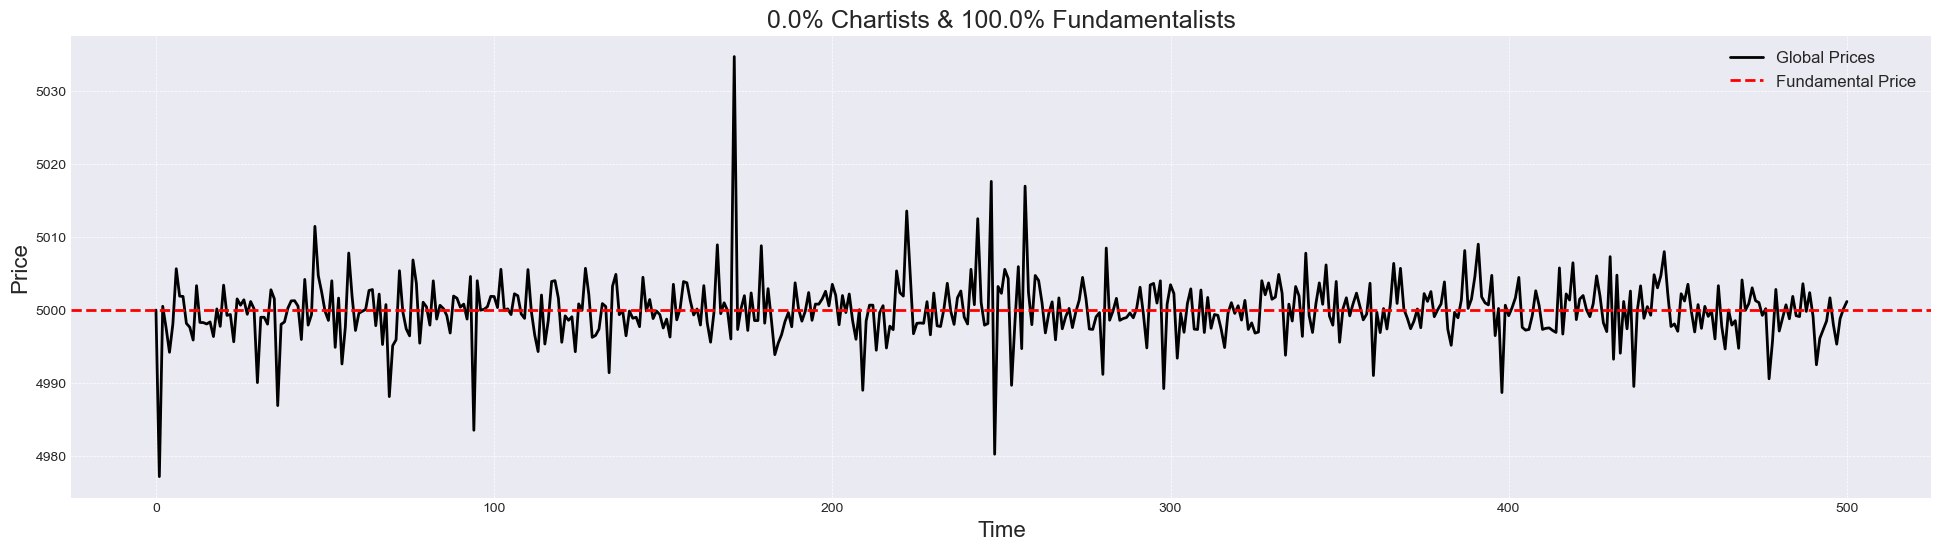

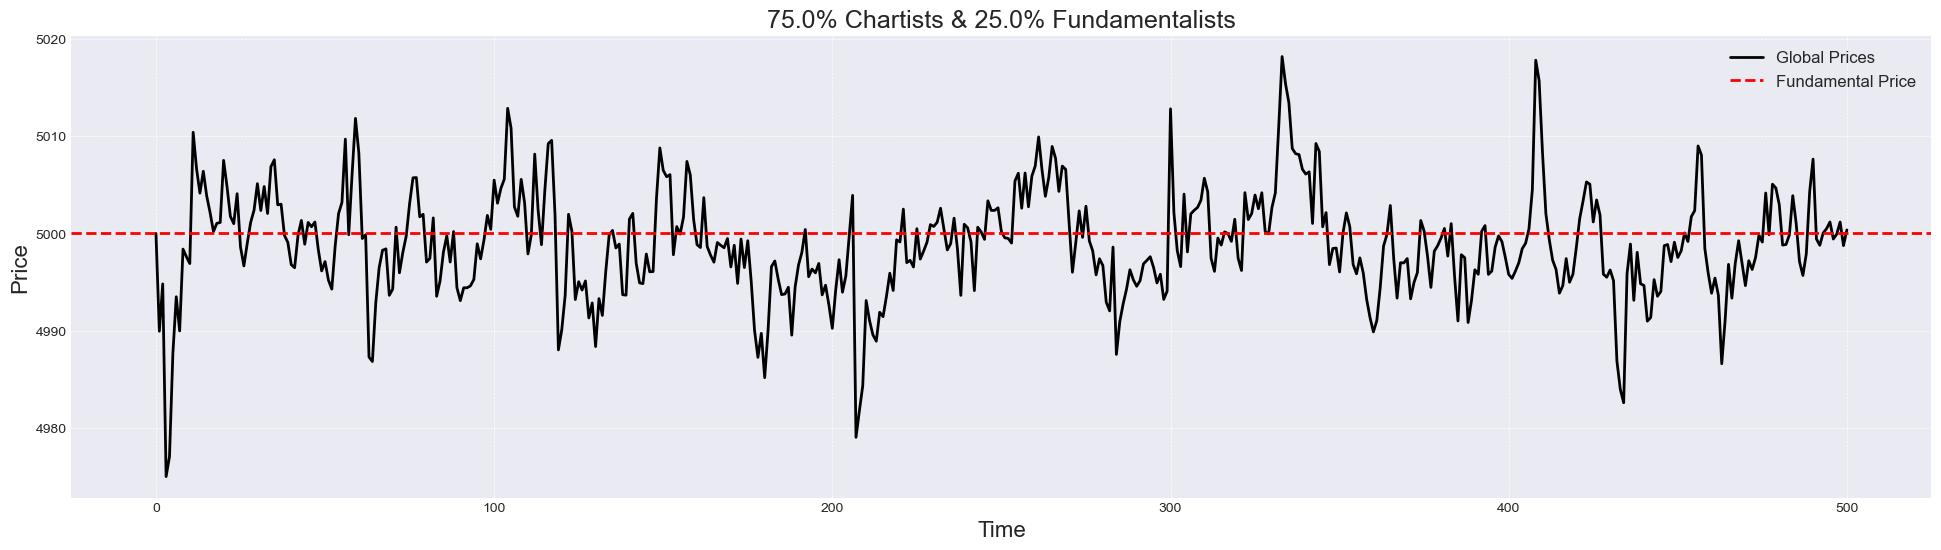

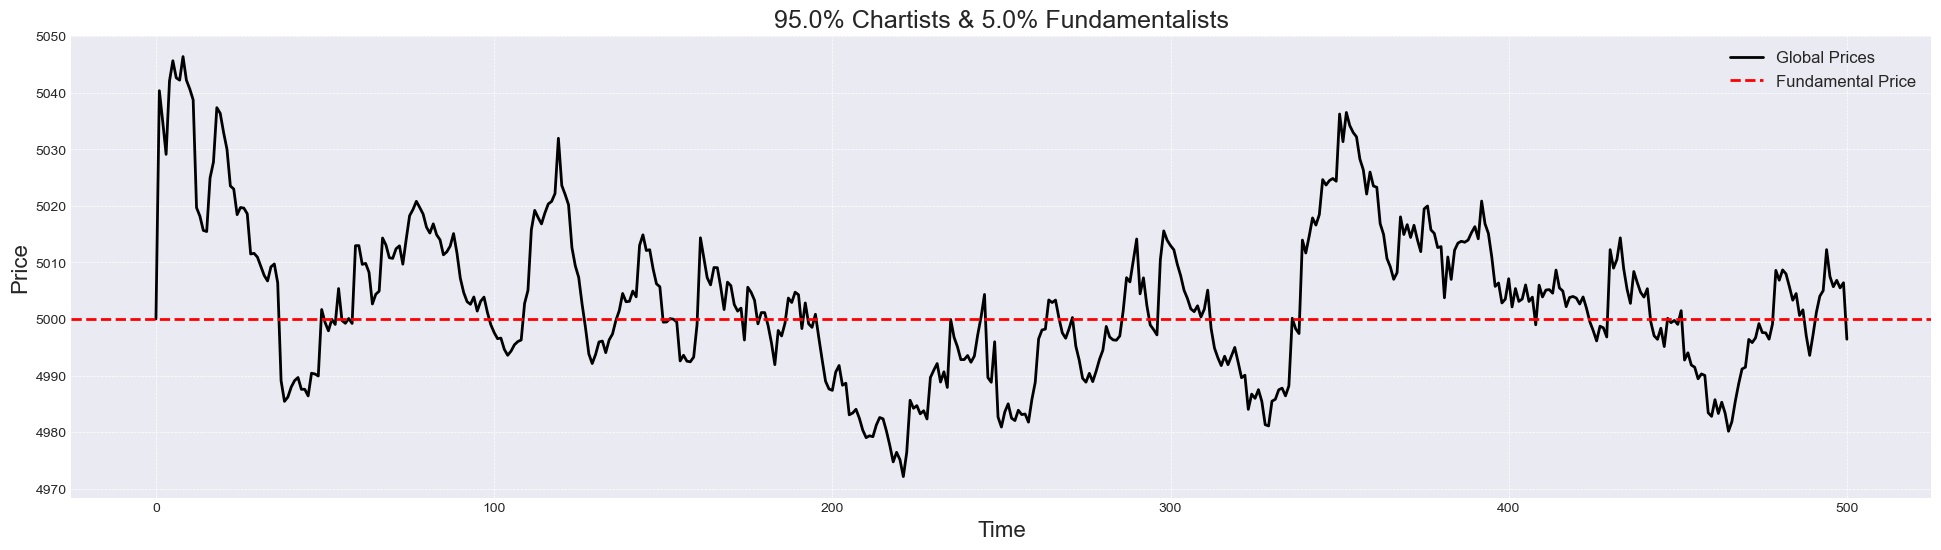

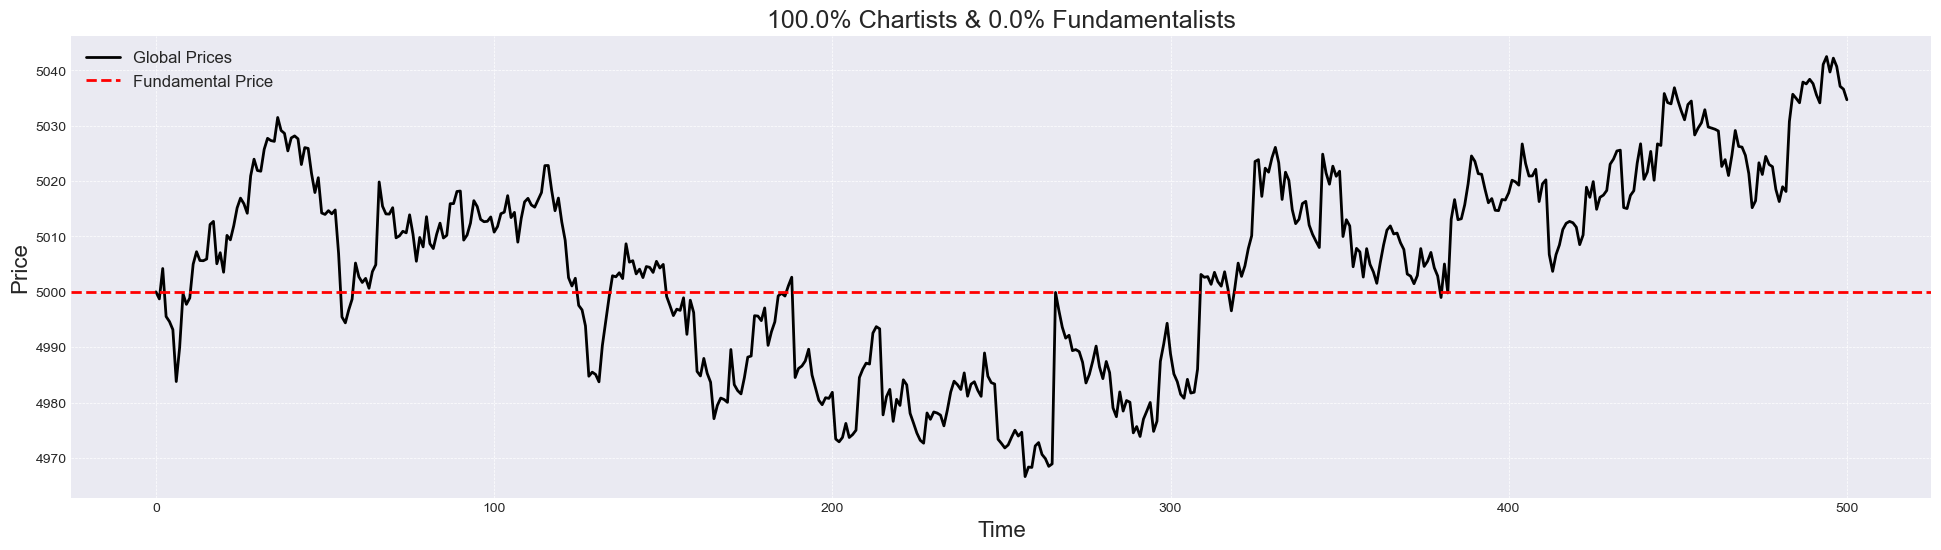

In [5]:
generate_price_plots(df)

### Showing how price goes towards the fundamental value

Running simulation for network: small_world and ratio: [1, 0]
Running simulation for network: small_world and ratio: [0.99, 0.01]


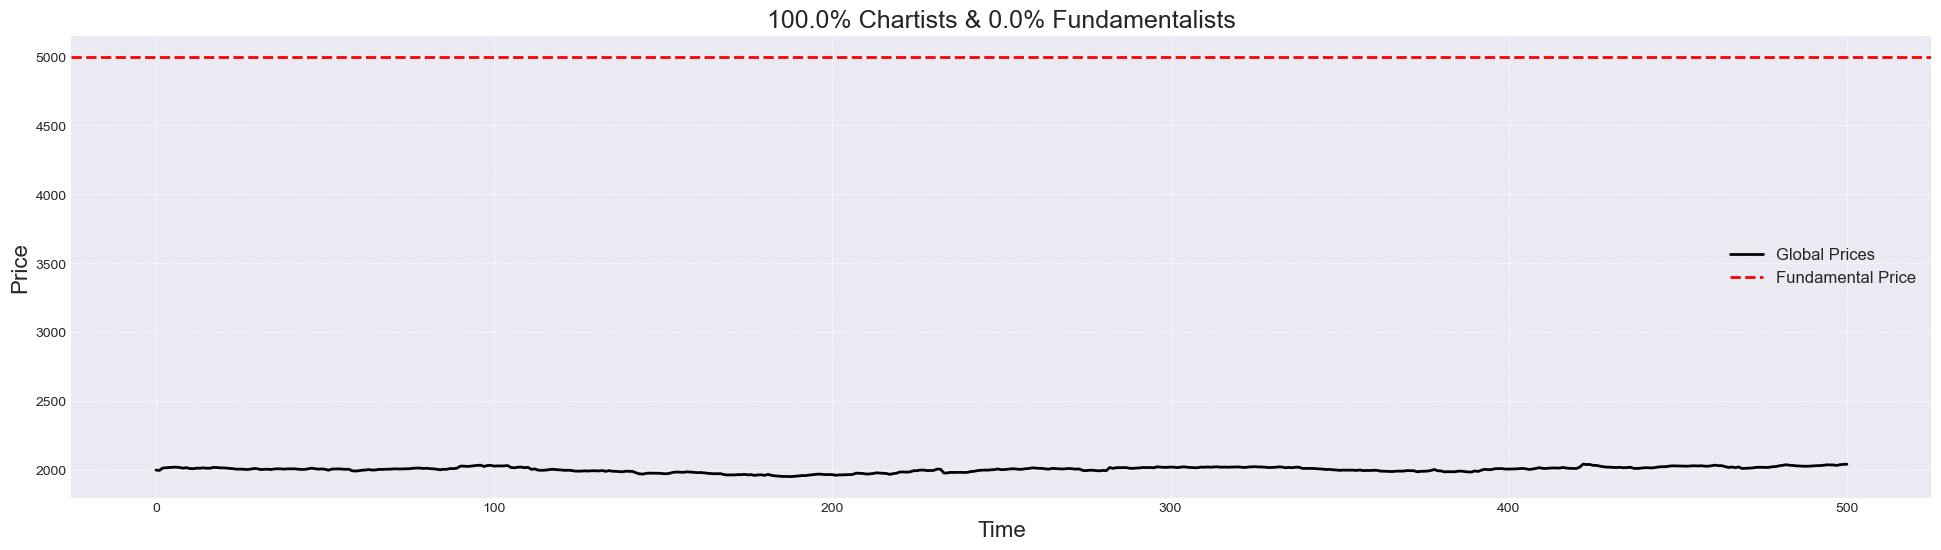

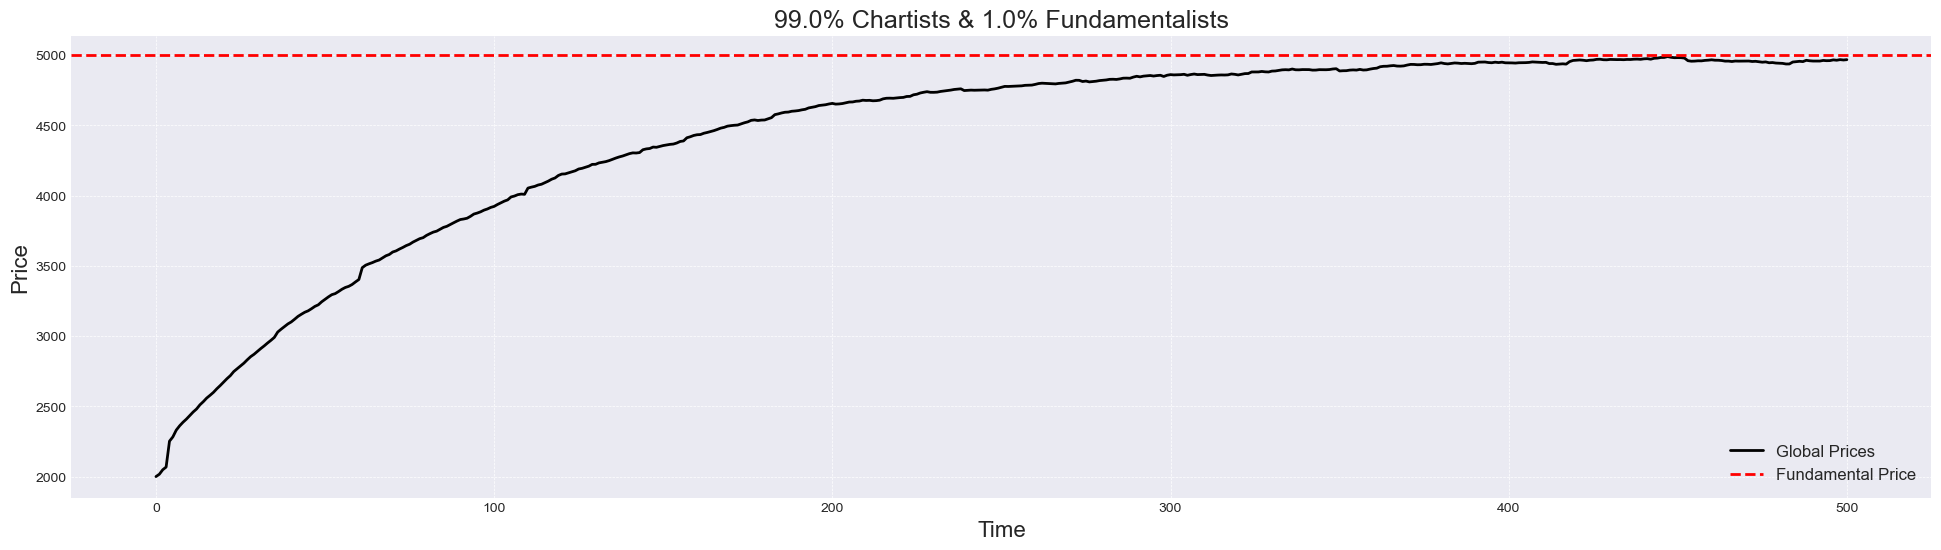

In [6]:
global_prices_2 = [2000]
chartist_fundamentalist_ratio = [[1,0],[0.99,0.01]]
df2 = create_data_frame(chartist_fundamentalist_ratio,networks,network_params, max_info, global_prices_2, alpha, sigma, beta, pf, info_list, avalanches, num_days)
generate_price_plots(df2)

## Information SOC Plots

### Average info, max info analysis 

In [4]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_days = 10000
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


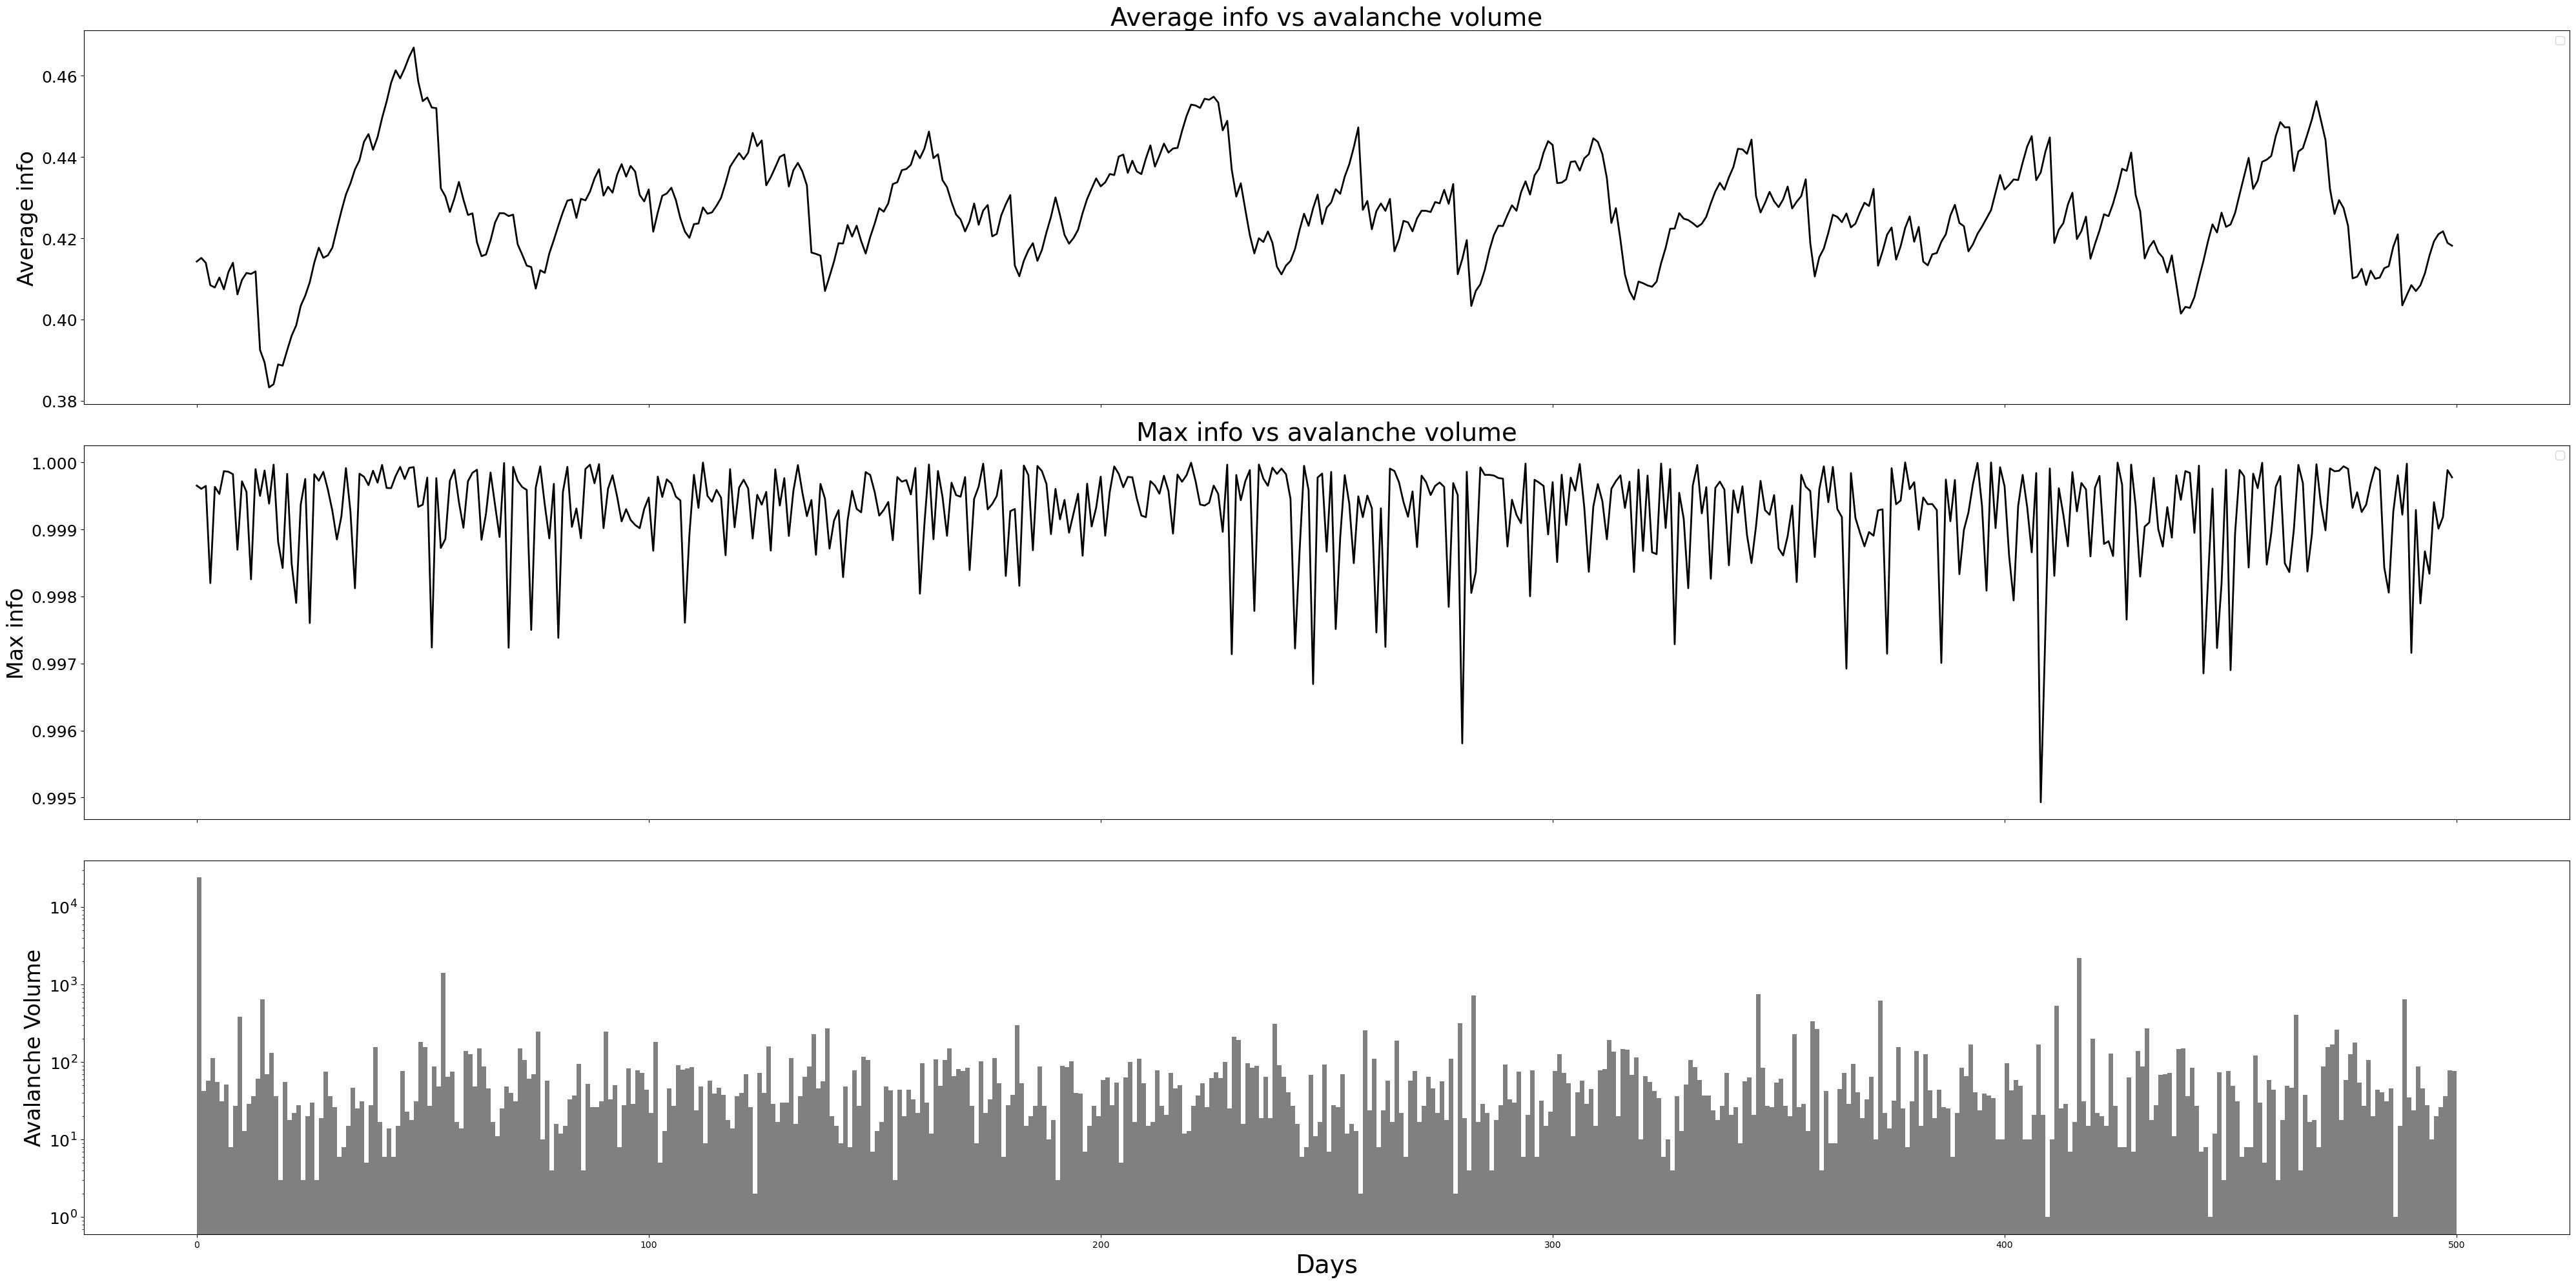

In [5]:
plot_average_and_max_info(global_prices, info_list,avalanches)

### Information avalanche power law for small world network

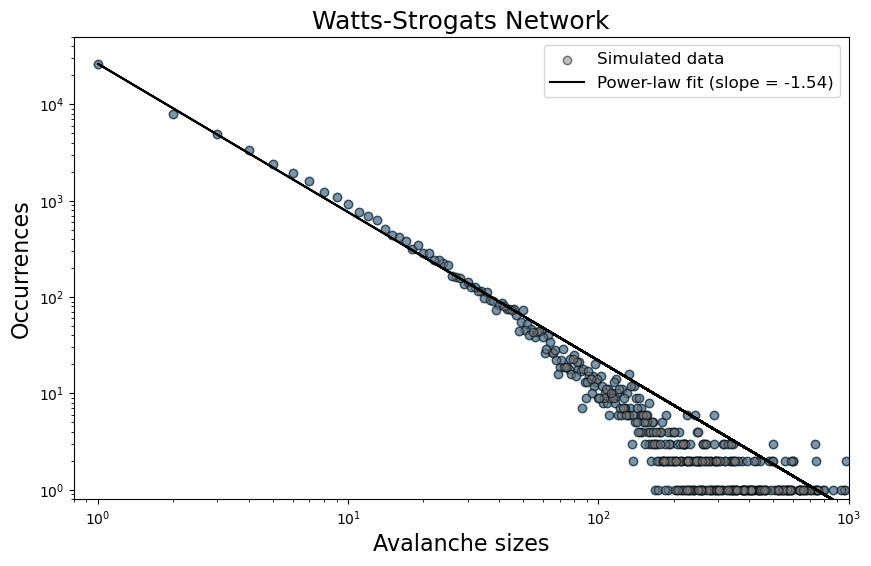

In [6]:
plot_info_power_law_wattz(avalanches)

### Hypothesis testing avalanch size power law for small world network

In [ ]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

### Information avalanche power law for Barabasi network

In [6]:
#Extract relevant lists for 25% fundamentalists and 75% chartists
num_traders = 10000           # USING A GREATER NUMBER OF TRADERS TO MAKE SURE ITS SCALE FREE
networks = ['barabasi']       #Setting network to random network
num_days = 5000
alpha = 0.75
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)


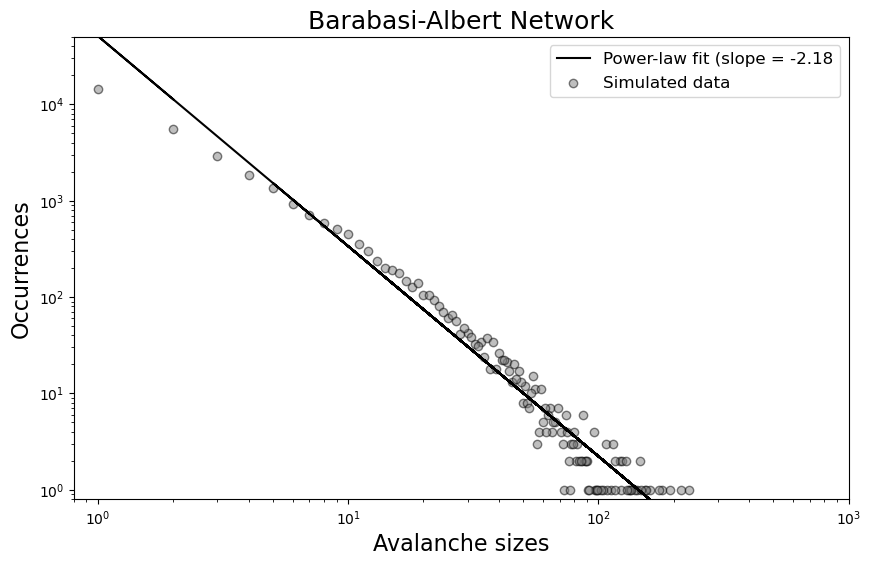

In [7]:
plot_info_power_law_barabasi(avalanches)

### Hypothesis testing avalanch size power law for Barabasi network

In [8]:
R,p = power_law_hypothesis_test(avalanches)
print(R,p)

Calculating best minimal value for power law fit
15.759054784267018 0.02513566851895796


## Price SOC plots

### Price power law

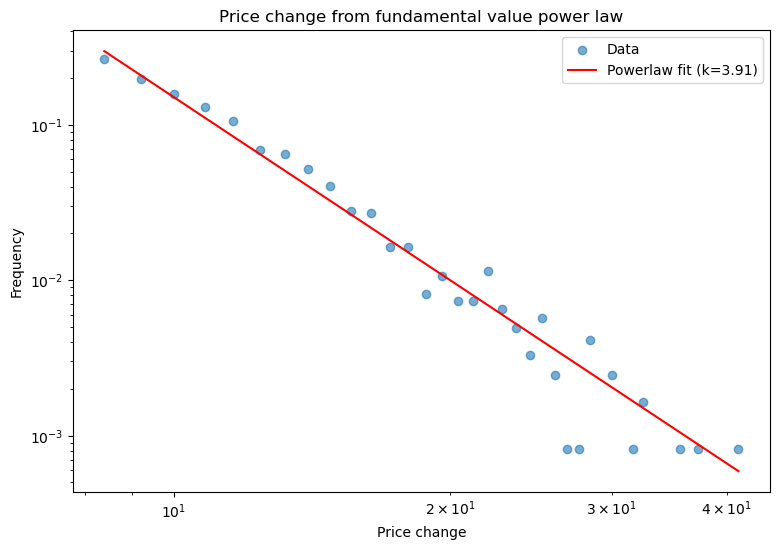

In [8]:
plot_price_change_power_law(global_prices,pf)

### Fat tail returns

In [9]:
#Compute normalised returns
normalized_returns = compute_normalised_returns(global_prices)

/Users/alex_1/Documents/GitHub/ComplexSystemsProject/Project Folder/plotting.py:338: RuntimeWarning: invalid value encountered in power
  return A * (1 - (1 - q) * B * x ** 2) ** (1 / (1 - q))


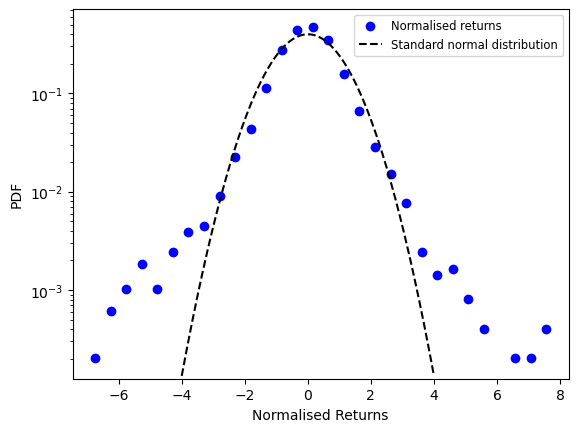

0.763230100386579


In [10]:
plot_fat_tail_returns(normalized_returns)

### QQ plot

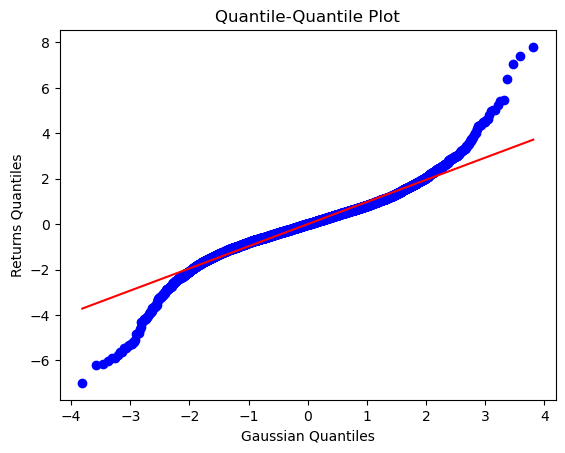

In [11]:
plot_qq_plot(normalized_returns)

## Testing system robustness

### Hypothesis testing price change power law for different ratios of traders

In [ ]:
num_days = 1000
fundamental_percentage_list = np.arange(0,1.05,0.05)
p_list,R_list =  multiple_runs_power_law_hypothesis_test(fundamental_percentage_list, network_params, networks ,max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


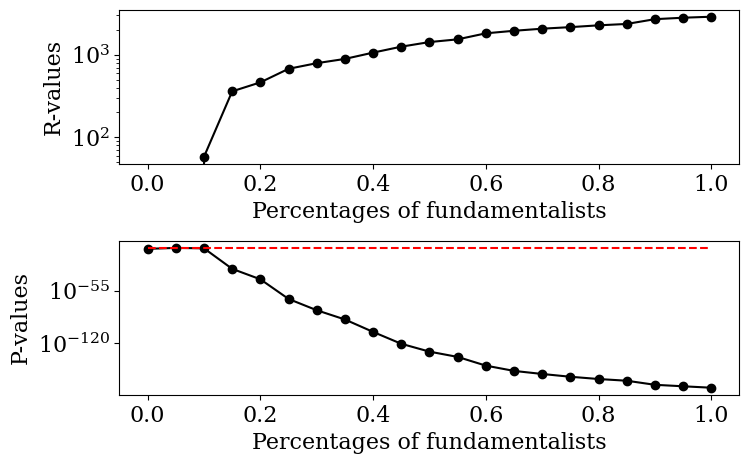

In [ ]:
plot_p_values(fundamental_percentage_list, p_list, R_list)

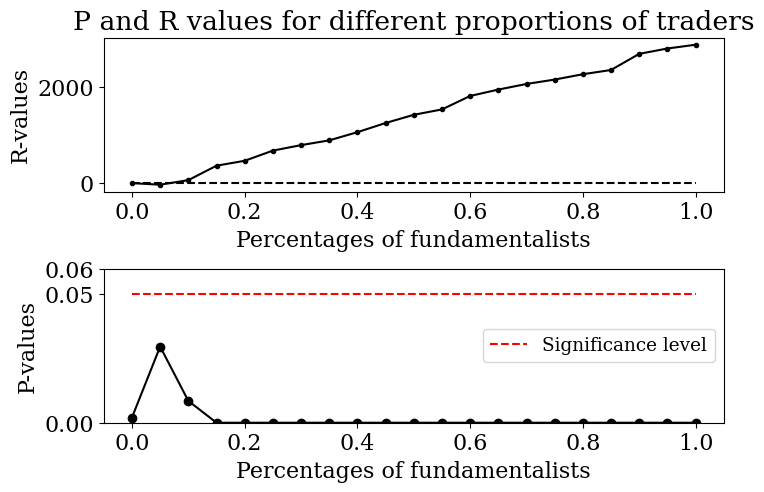

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

plt.subplots_adjust(hspace=0.5)  # Adjusts the vertical space between subplots

ax1.plot(fundamental_percentage_list, R_list, marker = "o", color = "black", markersize=3)
ax1.set_title("P and R values for different proportions of traders")
ax1.set_xlabel("Percentages of fundamentalists")
ax1.set_ylabel("R-values")
ax1.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
#ax1.set_yscale('log')
#ax1.set_ylim(-100, 500)
#ax1.set_xlim(0, 0.25)


ax1.hlines(0, xmin=0, xmax=1, colors='black', linestyles='dashed')

#ax1.set_yticks(range(int(min(R_list) * 1.1), int(max(R_list) * 1.1), 500))
ax2.plot(fundamental_percentage_list, p_list, marker = "o", color = "black")
ax2.set_xlabel("Percentages of fundamentalists")
ax2.set_ylabel("P-values")
#ax2.set_yscale('log')
ax2.hlines(0.05, xmin=0, xmax=1, colors='r', linestyles='dashed', label = "Significance level")
ax2.set_ylim(0, 0.06)
ax2.set_yticks([0, 0.05, ax2.get_yticks()[-1]])
ax2.legend(fontsize='small', loc= 'center right')



## Price change vs avalanch sizes

In [ ]:
num_days = 1000
avalanches,avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day = run_simulation(network_params, networks[0],max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

In [12]:
price_change_list = [global_prices[i] - global_prices[i-1] for i in range(len(global_prices)-1)]

[33.0, 19.0, 850.0, 130.0, 552.0, 80.0, 82.0, 112.0, 63.0, 25.0, 72.0, 34.0, 1.0, 26.0, 32.0, 29.0, 18.0, 49.0, 24.0, 3.0, 29.0, 11.0, 36.0, 18.0, 42.0, 5.0, 26.0, 40.0, 20.0, 25.0, 46.0, 61.0, 3.0, 34.0, 107.0, 15.0, 42.0, 21.0, 8.0, 19.0, 12.0, 16.0, 12.0, 63.0, 49.0, 17.0, 26.0, 23.0, 7.0, 141.0, 184.0, 71.0, 20.0, 411.0, 105.0, 11.0, 134.0, 13.0, 67.0, 23.0, 56.0, 31.0, 29.0, 18.0, 13.0, 90.0, 5.0, 46.0, 15.0, 30.0, 20.0, 82.0, 32.0, 43.0, 5.0, 43.0, 61.0, 12.0, 133.0, 122.0, 164.0, 57.0, 22.0, 32.0, 14.0, 49.0, 31.0, 25.0, 20.0, 30.0, 13.0, 31.0, 7.0, 2.0, 27.0, 19.0, 45.0, 24.0, 26.0, 28.0, 41.0, 37.0, 94.0, 26.0, 6.0, 11.0, 16.0, 20.0, 208.0, 96.0, 65.0, 500.0, 45.0, 9.0, 489.0, 105.0, 44.0, 306.0, 56.0, 2.0, 12.0, 50.0, 20.0, 25.0, 0.0, 53.0, 8.0, 5.0, 31.0, 58.0, 11.0, 169.0, 18.0, 18.0, 16.0, 15.0, 51.0, 25.0, 59.0, 206.0, 4.0, 18.0, 19.0, 154.0, 44.0, 6.0, 49.0, 71.0, 120.0, 23.0, 7.0, 42.0, 59.0, 16.0, 127.0, 142.0, 1007.0, 49.0, 10.0, 31.0, 39.0, 5.0, 8.0, 8.0, 33.0, 21.0,

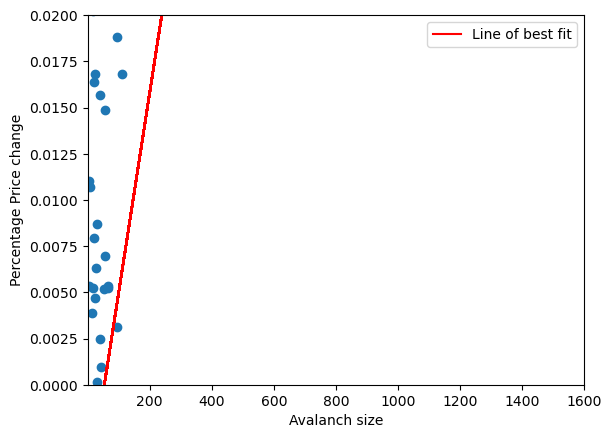

In [13]:
#print(sum_avalanch_per_day)
#print(price_change_list)

zipped = list(zip(sum_avalanch_per_day, price_change_list))

#print(global_prices)
#print("MAX AVALANCH -->", np.max(sum_avalanch_per_day))
#print("MAX PRICE CHANGE-->",np.max(price_change_list))


# Assuming sum_avalanch_per_day and price_change_list are your existing data lists
sum_avalanch_per_day = np.array(sum_avalanch_per_day)
price_change_list = np.array(price_change_list)

sum_avalanch_per_day_truncated = []
price_change_list_truncated = []

for i in range(len(sum_avalanch_per_day)):

    if(sum_avalanch_per_day[i] < 1600):
        sum_avalanch_per_day_truncated.append(sum_avalanch_per_day[i])
        price_change_list_truncated.append(price_change_list[i])

print(sum_avalanch_per_day_truncated)


# Perform linear regression
slope, intercept, _, _, _ = linregress(sum_avalanch_per_day_truncated, price_change_list_truncated)

# Function to calculate y-values for the line of best fit
def line_of_best_fit(x):
    return slope * x + intercept

# Generate y-values for the line of best fit
line_y = line_of_best_fit(sum_avalanch_per_day)

# Plotting the scatter plot
plt.scatter(sum_avalanch_per_day, price_change_list)
plt.xlabel("Avalanch size")
plt.ylabel("Percentage Price change")

# Plotting the line of best fit
plt.plot(sum_avalanch_per_day, line_y, color='red', label='Line of best fit')

# Show legend
plt.legend()
plt.xlim(0.8,1600)
plt.ylim(0,0.02)
# Show the plot
plt.show()



#print(np.where(sum_avalanch_per_day = np.max(sum_avalanch_per_day)))